In [41]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import misc
from sklearn import tree
import pydotplus
from IPython.display import Image

#from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, KFold
from sklearn.model_selection import GridSearchCV
from sklearn.externals.six import StringIO
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, accuracy_score


pd.set_option('display.notebook_repr_html', True)

In [42]:
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

In [43]:
def print_tree(estimator, features, class_names=None, filled=True):
    tree = estimator
    names = features
    color = filled
    classn = class_names

    dot_data = StringIO()
    export_graphviz(estimator, out_file=dot_data, feature_names=features, class_names=classn, filled=filled)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return(graph)


In [44]:
data = pd.read_csv('data.csv')
data.head()

NO  acousticness  danceability  duration_ms  energy  instrumentalness  key  \
0   0        0.0102         0.833       204600   0.434          0.021900    2   
1   1        0.1990         0.743       326933   0.359          0.006110    1   
2   2        0.0344         0.838       185707   0.412          0.000234    2   
3   3        0.6040         0.494       199413   0.338          0.510000    5   
4   4        0.1800         0.678       392893   0.561          0.512000    5   

   liveness  loudness  mode  speechiness    tempo  time_signature  valence  \
0    0.1650    -8.795     1       0.4310  150.062             4.0    0.286   
1    0.1370   -10.401     1       0.0794  160.083             4.0    0.588   
2    0.1590    -7.148     1       0.2890   75.044             4.0    0.173   
3    0.0922   -15.236     1       0.0261   86.468             4.0    0.230   
4    0.4390   -11.648     0       0.0694  174.004             4.0    0.904   

   target      song_title            artist  
0       1        Mask Off            Future  
1       1         Redbone  Childish Gambino  
2       1    Xanny Family            Future  
3       1  Master Of None       Beach House  
4       1  Parallel Lines       Junior Boys

In [45]:
data.columns

Index([u'NO', u'acousticness', u'danceability', u'duration_ms', u'energy',
       u'instrumentalness', u'key', u'liveness', u'loudness', u'mode',
       u'speechiness', u'tempo', u'time_signature', u'valence', u'target',
       u'song_title', u'artist'],
      dtype='object')

In [46]:
data.dtypes

NO                    int64
acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
speechiness         float64
tempo               float64
time_signature      float64
valence             float64
target                int64
song_title           object
artist               object
dtype: object

In [47]:
train, test = train_test_split(data, test_size = 0.20)
print("Training samples: {}; Test samples: {}".format(len(train), len(test)))

Training samples: 1613; Test samples: 404


In [48]:
c = tree.DecisionTreeClassifier(min_samples_leaf=3, random_state=10)

In [49]:
features = ["valence", "energy", "danceability", "speechiness", "acousticness", "instrumentalness", "loudness","duration_ms","liveness","tempo","time_signature","mode","key"]

X = data[features]
y = data["target"]
X_train = train[features]
y_train = train["target"]

X_test = test[features]
y_test = test["target"]

dt = c.fit(X_train, y_train)

[ 0.08310357  0.13583154  0.09007089  0.11466015  0.07025617  0.14700709
  0.1104159   0.10551179  0.04592824  0.05603262  0.          0.00939264
  0.03178939]
Random Forest (n_est: 100) Accuracy: 92.9%
('Error Rate: ', 0.37084779375309862, '\n')
             precision    recall  f1-score   support

          0       0.64      0.56      0.60       997
          1       0.62      0.70      0.65      1020

avg / total       0.63      0.63      0.63      2017

0.69801980198
('Error Rate: ', 0.35002478929102632, '\n')
             precision    recall  f1-score   support

          0       0.66      0.59      0.62       997
          1       0.64      0.71      0.67      1020

avg / total       0.65      0.65      0.65      2017

Evaluate hidden layer 1 done, accuracy 0.67
Evaluate hidden layer 2 done, accuracy 0.70
Evaluate hidden layer 3 done, accuracy 0.70
Evaluate hidden layer 4 done, accuracy 0.71
Evaluate hidden layer 5 done, accuracy 0.71
Evaluate hidden layer 6 done, accuracy 0.73
E

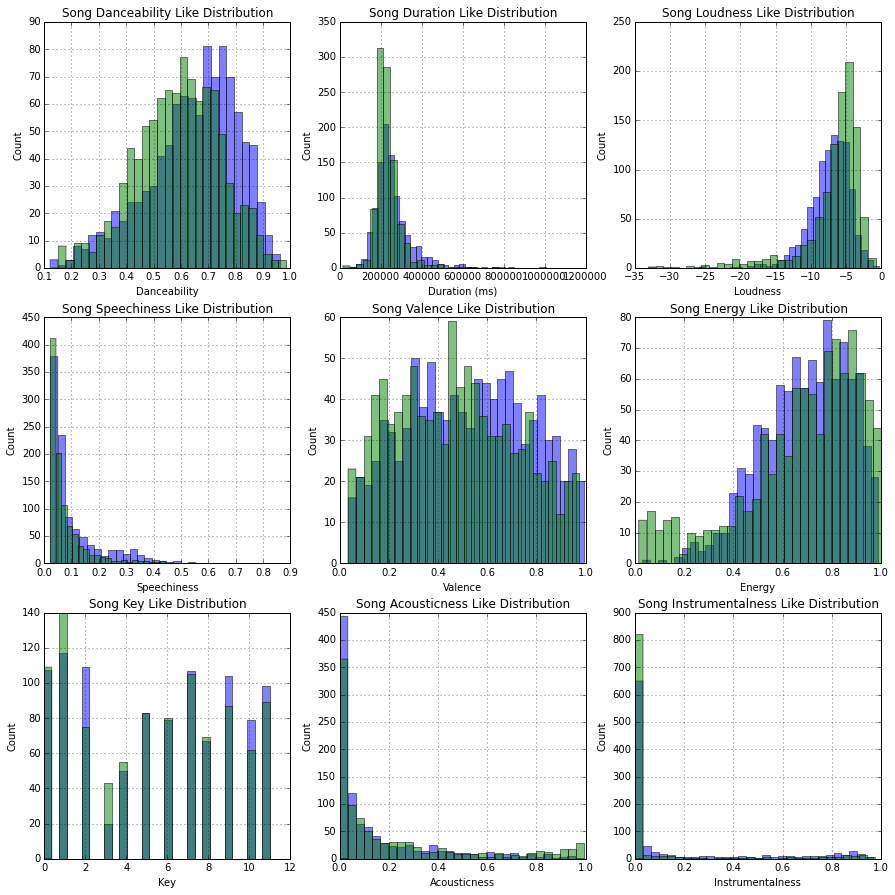

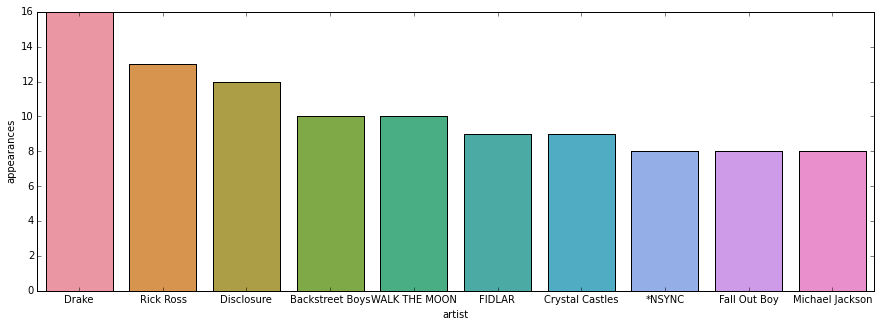

In [51]:
# print(clf.cv_results_['mean_test_score'])
# print(clf.cv_results_['params'])
print (c.feature_importances_)


pos_valence = data[data['target'] == 1]['valence']
neg_valence = data[data['target'] == 0]['valence']
pos_energy = data[data['target'] == 1]['energy']
neg_energy = data[data['target'] == 0]['energy']
pos_dance = data[data['target'] == 1]['danceability']
neg_dance = data[data['target'] == 0]['danceability']
pos_speechiness = data[data['target'] == 1]['speechiness']
neg_speechiness = data[data['target'] == 0]['speechiness']
pos_instrumentalness = data[data['target'] == 1]['instrumentalness']
neg_instrumentalness = data[data['target'] == 0]['instrumentalness']
pos_duration = data[data['target'] == 1]['duration_ms']
neg_duration = data[data['target'] == 0]['duration_ms']
pos_loudness = data[data['target'] == 1]['loudness']
neg_loudness = data[data['target'] == 0]['loudness']
pos_acousticness = data[data['target'] == 1]['acousticness']
neg_acousticness = data[data['target'] == 0]['acousticness']
pos_key = data[data['target'] == 1]['key']
neg_key = data[data['target'] == 0]['key']


# In[15]:

fig2 = plt.figure(figsize=(15, 15))

# Danceability
ax3 = fig2.add_subplot(331)
ax3.set_xlabel('Danceability')
ax3.set_ylabel('Count')
ax3.set_title("Song Danceability Like Distribution")
pos_dance.hist(alpha=0.5, bins=30)
ax4 = fig2.add_subplot(331)
neg_dance.hist(alpha=0.5, bins=30)


# Duration
ax5 = fig2.add_subplot(332)
pos_duration.hist(alpha=0.5, bins=30)
ax5.set_xlabel('Duration (ms)')
ax5.set_ylabel('Count')
ax5.set_title("Song Duration Like Distribution")
ax6 = fig2.add_subplot(332)
neg_duration.hist(alpha=0.5, bins=30)


# Loudness
ax7 = fig2.add_subplot(333)
pos_loudness.hist(alpha=0.5, bins=30)
ax7.set_xlabel('Loudness')
ax7.set_ylabel('Count')
ax7.set_title("Song Loudness Like Distribution")

ax8 = fig2.add_subplot(333)
neg_loudness.hist(alpha=0.5, bins=30)

# Speechiness
ax9 = fig2.add_subplot(334)
pos_speechiness.hist(alpha=0.5, bins=30)
ax9.set_xlabel('Speechiness')
ax9.set_ylabel('Count')
ax9.set_title("Song Speechiness Like Distribution")

ax10 = fig2.add_subplot(334)
neg_speechiness.hist(alpha=0.5, bins=30)

# Valence
ax11 = fig2.add_subplot(335)
pos_valence.hist(alpha=0.5, bins=30)
ax11.set_xlabel('Valence')
ax11.set_ylabel('Count')
ax11.set_title("Song Valence Like Distribution")

ax12 = fig2.add_subplot(335)
neg_valence.hist(alpha=0.5, bins=30)

# Energy
ax13 = fig2.add_subplot(336)
pos_energy.hist(alpha=0.5, bins=30)
ax13.set_xlabel('Energy')
ax13.set_ylabel('Count')
ax13.set_title("Song Energy Like Distribution")

ax14 = fig2.add_subplot(336)
neg_energy.hist(alpha=0.5, bins=30)

# Key
ax15 = fig2.add_subplot(337)
pos_key.hist(alpha=0.5, bins=30)
ax15.set_xlabel('Key')
ax15.set_ylabel('Count')
ax15.set_title("Song Key Like Distribution")

ax15 = fig2.add_subplot(337)
neg_key.hist(alpha=0.5, bins=30)

# Acousticness
ax16 = fig2.add_subplot(338)
pos_acousticness.hist(alpha=0.5, bins=30)
ax16.set_xlabel('Acousticness')
ax16.set_ylabel('Count')
ax16.set_title("Song Acousticness Like Distribution")

ax16 = fig2.add_subplot(338)
neg_acousticness.hist(alpha=0.5, bins=30)

# Instrumentalness
ax17 = fig2.add_subplot(339)
pos_instrumentalness.hist(alpha=0.5, bins=30)
ax17.set_xlabel('Instrumentalness')
ax17.set_ylabel('Count')
ax17.set_title("Song Instrumentalness Like Distribution")

ax17 = fig2.add_subplot(339)
neg_instrumentalness.hist(alpha=0.5, bins=30)


# In[16]:

#keep dancability, loudness, Speechiness, Valence,Energy, Instrumentalness.


# In[25]:

features_rec = ["valence", "energy", "danceability", "speechiness", "instrumentalness", "loudness"]
X_train2 = train[features_rec]
y_train2 = train["target"]
X_test2 = test[features_rec]
y_test2 = test["target"]
X2 = data[features_rec]
y2 = data["target"]


# In[30]:

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 10)
clf.fit(X_train2, y_train2)


# In[31]:

forest_y_pred = clf.predict(X2)
score = accuracy_score(y2, forest_y_pred) * 100
rounded_score = round(score, 1)
print("Random Forest (n_est: 100) Accuracy: {}%".format(rounded_score))


# In[32]:

clf2 = RandomForestClassifier(n_estimators = 100)
kf_10 = KFold(n_splits=10)
predicted = cross_val_predict(clf2, X2, y2, cv=kf_10, method='predict')
print ("Error Rate: ", 1-accuracy_score(y2, predicted), "\n")
print (classification_report(y2, predicted))


# # Build Ada-boost using scikit-learn

# In[39]:

from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split


# In[40]:

abc = AdaBoostClassifier()
abc.fit(X_train2, y_train2)
tst_pred = abc.predict(X_test2)
print (np.count_nonzero(tst_pred == y_test2) / float(y_test2.size))


# In[41]:

abc2 = AdaBoostClassifier()
kf_10 = KFold(n_splits=10)
predicted = cross_val_predict(clf2, X, y, cv=kf_10, method='predict')
print ("Error Rate: ", 1-accuracy_score(y, predicted), "\n")
print (classification_report(y, predicted))



hidden_neuron_nums = list(range(1,10))
#[2,3,4,5,6...9, 10, 20, 30, ... 90, 100, 125, 150, 175]
total_performance_records = []
for hn in hidden_neuron_nums:
    c_ = tree.DecisionTreeClassifier(min_samples_leaf=hn, random_state=10)
    perf_records_ = []
    for i in range(10):
         c_.fit(X_train, y_train)
         tst_p_ = c_.predict(X_test)
         performance = np.sum(tst_p_ == y_test) / float(tst_p_.size)
         perf_records_.append(performance)
    total_performance_records.append(np.mean(perf_records_))
    print ("Evaluate hidden layer {} done, accuracy {:.2f}".format(
        hn, total_performance_records[-1]))


# In[19]:

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100)
clf.fit(X_train, y_train)


# In[20]:

forest_y_pred = clf.predict(X_test)
score = accuracy_score(y_test, forest_y_pred) * 100
rounded_score = round(score, 1)
print("Random Forest (n_est: 100) Accuracy: {}%".format(rounded_score))


# In[ ]:

print (c.feature_importances_)

speaker_df = data.groupby('artist').count().reset_index()[['artist', 'target']]
speaker_df.columns = ['artist', 'appearances']
speaker_df = speaker_df.sort_values('appearances', ascending=False)
speaker_df.head(10)


# In[ ]:

plt.figure(figsize=(15,5))
sns.barplot(x='artist', y='appearances', data=speaker_df.head(10))
plt.show()

Decision Tree Classifier Accuracy: 69.8%
Decision Tree Classifier Accuracy: 93.8%
('Error Rate: ', 0.40555280118988601, '\n')
             precision    recall  f1-score   support

          0       0.59      0.57      0.58       997
          1       0.60      0.62      0.61      1020

avg / total       0.59      0.59      0.59      2017



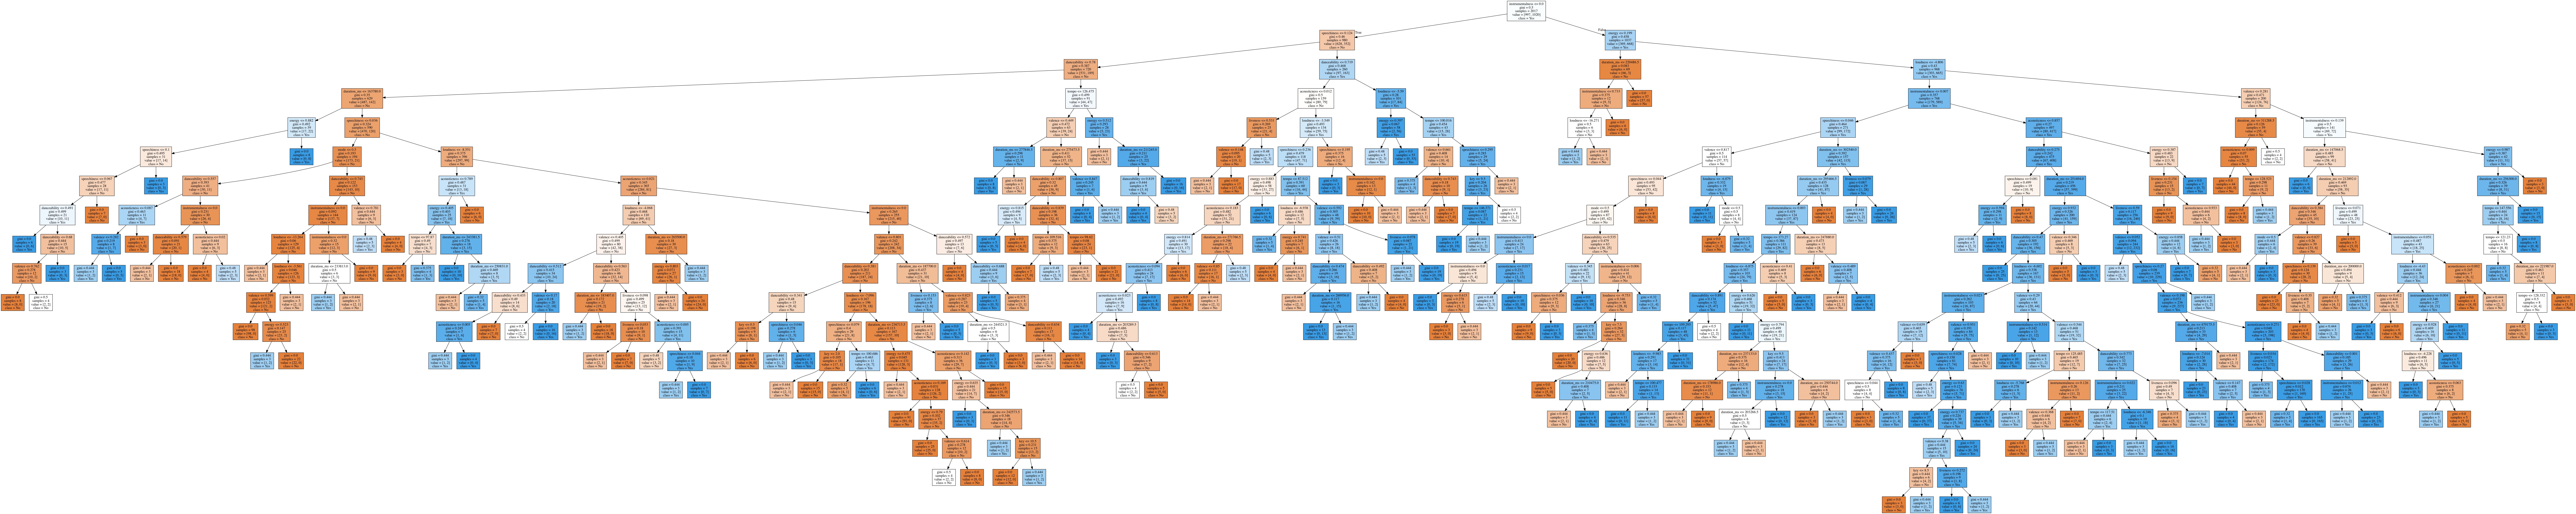

In [52]:
y_pred = c.predict(X_test)


score = accuracy_score(y_test, y_pred) * 100
rounded_score = round(score, 1)
print("Decision Tree Classifier Accuracy: {}%".format(rounded_score))

dt2 = c.fit(X, y)

y_pred2 = c.predict(X)

score = accuracy_score(y, y_pred2) * 100
rounded_score = round(score, 1)
print("Decision Tree Classifier Accuracy: {}%".format(rounded_score))


c2 = tree.DecisionTreeClassifier(min_samples_leaf=3, random_state=10)
kf_10 = KFold(n_splits=10)
predicted = cross_val_predict(c2, X, y, cv=kf_10, method='predict')
print ("Error Rate: ", 1-accuracy_score(y, predicted), "\n")
print (classification_report(y, predicted))

graph = print_tree(c, features, class_names=['No', 'Yes'])
Image(graph.create_png())





In [53]:

tuned_parameters = [{'min_samples_leaf': [1, 2, 3, 5, 10]},{'max_leaf_nodes': [2, 3, 5, 10]},]
clf = GridSearchCV(DecisionTreeClassifier(), param_grid =tuned_parameters, cv=10, scoring='accuracy')
clf.fit(X_train, y_train)



GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'min_samples_leaf': [1, 2, 3, 5, 10]}, {'max_leaf_nodes': [2, 3, 5, 10]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [54]:
clf.grid_scores_

/Library/Python/2.7/site-packages/sklearn/model_selection/_search.py:747: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.67328, std: 0.02440, params: {'min_samples_leaf': 1},
 mean: 0.66584, std: 0.02870, params: {'min_samples_leaf': 2},
 mean: 0.68010, std: 0.03281, params: {'min_samples_leaf': 3},
 mean: 0.69746, std: 0.03171, params: {'min_samples_leaf': 5},
 mean: 0.71048, std: 0.03970, params: {'min_samples_leaf': 10},
 mean: 0.62244, std: 0.03439, params: {'max_leaf_nodes': 2},
 mean: 0.65530, std: 0.03360, params: {'max_leaf_nodes': 3},
 mean: 0.69994, std: 0.04097, params: {'max_leaf_nodes': 5},
 mean: 0.70118, std: 0.02951, params: {'max_leaf_nodes': 10}]

[ 0.10402057  0.13819637  0.11087146  0.12175518  0.06345078  0.15778435
  0.11259359  0.09486057  0.02280238  0.04938793  0.          0.0115756
  0.01270122]
Random Forest (n_est: 100) Accuracy: 92.4%
('Error Rate: ', 0.36936043629152204, '\n')
             precision    recall  f1-score   support

          0       0.64      0.57      0.60       997
          1       0.62      0.69      0.65      1020

avg / total       0.63      0.63      0.63      2017

0.69801980198
('Error Rate: ', 0.3465542885473476, '\n')
             precision    recall  f1-score   support

          0       0.67      0.60      0.63       997
          1       0.64      0.71      0.67      1020

avg / total       0.65      0.65      0.65      2017

Evaluate hidden layer 1 done, accuracy 0.67
Evaluate hidden layer 2 done, accuracy 0.70
Evaluate hidden layer 3 done, accuracy 0.70
Evaluate hidden layer 4 done, accuracy 0.71
Evaluate hidden layer 5 done, accuracy 0.71
Evaluate hidden layer 6 done, accuracy 0.73
Eva

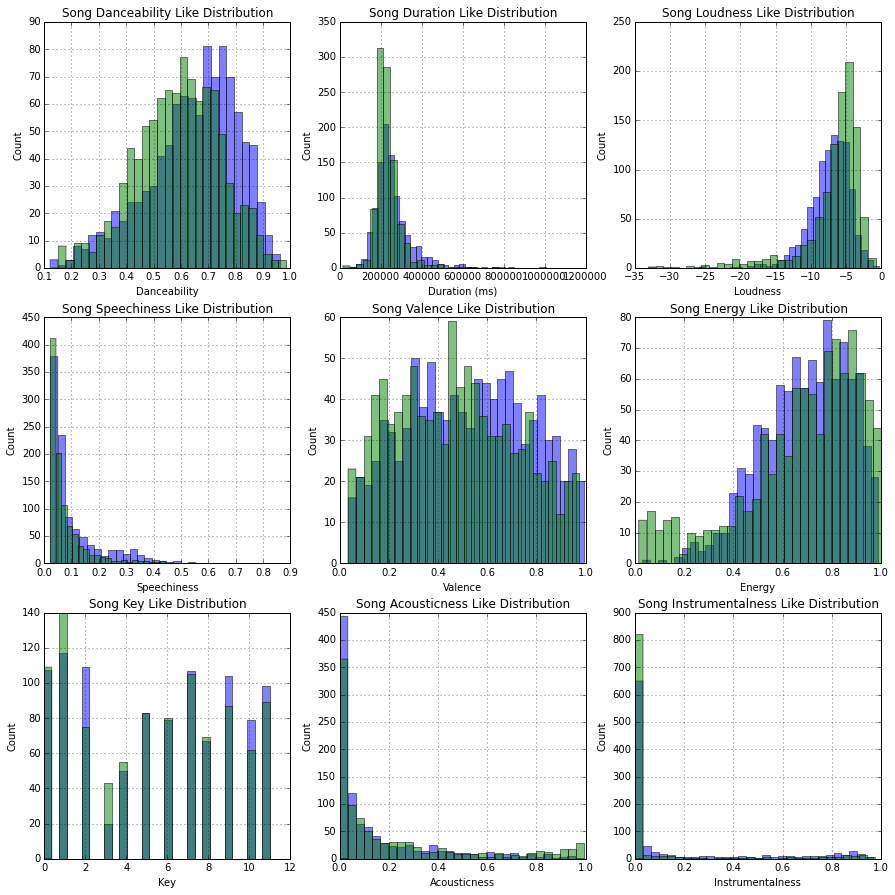

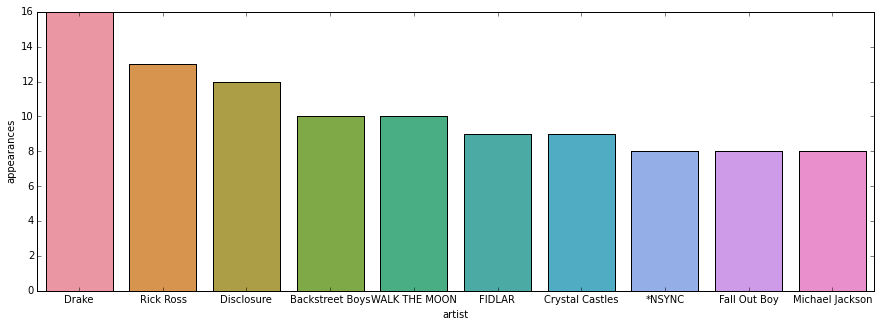

In [57]:
print (c.feature_importances_)


# In[13]:

#drop 5 features


# In[14]:

pos_valence = data[data['target'] == 1]['valence']
neg_valence = data[data['target'] == 0]['valence']
pos_energy = data[data['target'] == 1]['energy']
neg_energy = data[data['target'] == 0]['energy']
pos_dance = data[data['target'] == 1]['danceability']
neg_dance = data[data['target'] == 0]['danceability']
pos_speechiness = data[data['target'] == 1]['speechiness']
neg_speechiness = data[data['target'] == 0]['speechiness']
pos_instrumentalness = data[data['target'] == 1]['instrumentalness']
neg_instrumentalness = data[data['target'] == 0]['instrumentalness']
pos_duration = data[data['target'] == 1]['duration_ms']
neg_duration = data[data['target'] == 0]['duration_ms']
pos_loudness = data[data['target'] == 1]['loudness']
neg_loudness = data[data['target'] == 0]['loudness']
pos_acousticness = data[data['target'] == 1]['acousticness']
neg_acousticness = data[data['target'] == 0]['acousticness']
pos_key = data[data['target'] == 1]['key']
neg_key = data[data['target'] == 0]['key']


# In[15]:

fig2 = plt.figure(figsize=(15, 15))

# Danceability
ax3 = fig2.add_subplot(331)
ax3.set_xlabel('Danceability')
ax3.set_ylabel('Count')
ax3.set_title("Song Danceability Like Distribution")
pos_dance.hist(alpha=0.5, bins=30)
ax4 = fig2.add_subplot(331)
neg_dance.hist(alpha=0.5, bins=30)


# Duration
ax5 = fig2.add_subplot(332)
pos_duration.hist(alpha=0.5, bins=30)
ax5.set_xlabel('Duration (ms)')
ax5.set_ylabel('Count')
ax5.set_title("Song Duration Like Distribution")
ax6 = fig2.add_subplot(332)
neg_duration.hist(alpha=0.5, bins=30)


# Loudness
ax7 = fig2.add_subplot(333)
pos_loudness.hist(alpha=0.5, bins=30)
ax7.set_xlabel('Loudness')
ax7.set_ylabel('Count')
ax7.set_title("Song Loudness Like Distribution")

ax8 = fig2.add_subplot(333)
neg_loudness.hist(alpha=0.5, bins=30)

# Speechiness
ax9 = fig2.add_subplot(334)
pos_speechiness.hist(alpha=0.5, bins=30)
ax9.set_xlabel('Speechiness')
ax9.set_ylabel('Count')
ax9.set_title("Song Speechiness Like Distribution")

ax10 = fig2.add_subplot(334)
neg_speechiness.hist(alpha=0.5, bins=30)

# Valence
ax11 = fig2.add_subplot(335)
pos_valence.hist(alpha=0.5, bins=30)
ax11.set_xlabel('Valence')
ax11.set_ylabel('Count')
ax11.set_title("Song Valence Like Distribution")

ax12 = fig2.add_subplot(335)
neg_valence.hist(alpha=0.5, bins=30)

# Energy
ax13 = fig2.add_subplot(336)
pos_energy.hist(alpha=0.5, bins=30)
ax13.set_xlabel('Energy')
ax13.set_ylabel('Count')
ax13.set_title("Song Energy Like Distribution")

ax14 = fig2.add_subplot(336)
neg_energy.hist(alpha=0.5, bins=30)

# Key
ax15 = fig2.add_subplot(337)
pos_key.hist(alpha=0.5, bins=30)
ax15.set_xlabel('Key')
ax15.set_ylabel('Count')
ax15.set_title("Song Key Like Distribution")

ax15 = fig2.add_subplot(337)
neg_key.hist(alpha=0.5, bins=30)

# Acousticness
ax16 = fig2.add_subplot(338)
pos_acousticness.hist(alpha=0.5, bins=30)
ax16.set_xlabel('Acousticness')
ax16.set_ylabel('Count')
ax16.set_title("Song Acousticness Like Distribution")

ax16 = fig2.add_subplot(338)
neg_acousticness.hist(alpha=0.5, bins=30)

# Instrumentalness
ax17 = fig2.add_subplot(339)
pos_instrumentalness.hist(alpha=0.5, bins=30)
ax17.set_xlabel('Instrumentalness')
ax17.set_ylabel('Count')
ax17.set_title("Song Instrumentalness Like Distribution")

ax17 = fig2.add_subplot(339)
neg_instrumentalness.hist(alpha=0.5, bins=30)


# In[16]:

#keep dancability, loudness, Speechiness, Valence,Energy, Instrumentalness.


# In[25]:

features_rec = ["valence", "energy", "danceability", "speechiness", "instrumentalness", "loudness"]
X_train2 = train[features_rec]
y_train2 = train["target"]
X_test2 = test[features_rec]
y_test2 = test["target"]
X2 = data[features_rec]
y2 = data["target"]


# In[30]:

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 10)
clf.fit(X_train2, y_train2)


# In[31]:

forest_y_pred = clf.predict(X2)
score = accuracy_score(y2, forest_y_pred) * 100
rounded_score = round(score, 1)
print("Random Forest (n_est: 100) Accuracy: {}%".format(rounded_score))


# In[32]:

clf2 = RandomForestClassifier(n_estimators = 100)
kf_10 = KFold(n_splits=10)
predicted = cross_val_predict(clf2, X2, y2, cv=kf_10, method='predict')
print ("Error Rate: ", 1-accuracy_score(y2, predicted), "\n")
print (classification_report(y2, predicted))


# # Build Ada-boost using scikit-learn

# In[39]:

from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split


# In[40]:

abc = AdaBoostClassifier()
abc.fit(X_train2, y_train2)
tst_pred = abc.predict(X_test2)
print (np.count_nonzero(tst_pred == y_test2) / float(y_test2.size))


# In[41]:

abc2 = AdaBoostClassifier()
kf_10 = KFold(n_splits=10)
predicted = cross_val_predict(clf2, X, y, cv=kf_10, method='predict')
print ("Error Rate: ", 1-accuracy_score(y, predicted), "\n")
print (classification_report(y, predicted))


# In[ ]:




# In[ ]:




# In[ ]:




# In[ ]:




# In[ ]:

hidden_neuron_nums = list(range(1,10))
#[2,3,4,5,6...9, 10, 20, 30, ... 90, 100, 125, 150, 175]
total_performance_records = []
for hn in hidden_neuron_nums:
    c_ = tree.DecisionTreeClassifier(min_samples_leaf=hn, random_state=10)
    perf_records_ = []
    for i in range(10):
         c_.fit(X_train, y_train)
         tst_p_ = c_.predict(X_test)
         performance = np.sum(tst_p_ == y_test) / float(tst_p_.size)
         perf_records_.append(performance)
    total_performance_records.append(np.mean(perf_records_))
    print ("Evaluate hidden layer {} done, accuracy {:.2f}".format(
        hn, total_performance_records[-1]))


# In[19]:

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100)
clf.fit(X_train, y_train)


# In[20]:

forest_y_pred = clf.predict(X_test)
score = accuracy_score(y_test, forest_y_pred) * 100
rounded_score = round(score, 1)
print("Random Forest (n_est: 100) Accuracy: {}%".format(rounded_score))


# In[ ]:

print (c.feature_importances_)


# In[ ]:

speaker_df = data.groupby('artist').count().reset_index()[['artist', 'target']]
speaker_df.columns = ['artist', 'appearances']
speaker_df = speaker_df.sort_values('appearances', ascending=False)
speaker_df.head(10)

	
# In[ ]:

plt.figure(figsize=(15,5))
sns.barplot(x='artist', y='appearances', data=speaker_df.head(10))
plt.show()


# In[ ]:




# In[ ]:


